Testing Spatio-Centric Variogram

In [361]:
#Cargando librerías 

import importlib
import positioning_sensors as ps
importlib.reload(ps)

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np


plt.style.use("ggplot")

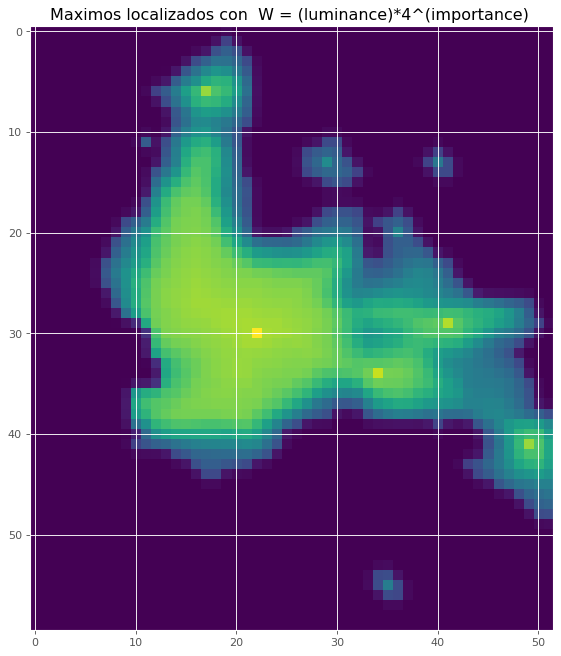

In [362]:
#cargamos imagenes en luminance e importance
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'
sigma_y = 0.5
sigma_x = 0.5
sigma = [sigma_y,sigma_x]

luminance = ps.readIMG(ilumina)
importance = ps.readIMG(niveles,invert=True)

nonsat = ps.desaturate(luminance,th=62)
nonsat = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')


seeds = ps.getMax(nonsat)

seeds_nonsat = ps.getMax(nonsat)
coords_nonsat = ps.get_coords(seeds_nonsat)

plt.figure(figsize=(10, 10), dpi=80)

plt.imshow(seeds*np.mean(nonsat)/1.5+nonsat)
plt.title("Maximos localizados con  W = (luminance)*4^(importance) ")
plt.show()

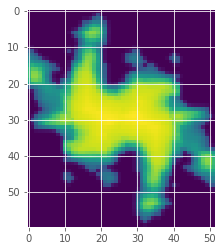

In [363]:
z = np.zeros((2,seeds_nonsat.shape[0],seeds_nonsat.shape[1]))
z[0] = nonsat
z[1] = np.flip(nonsat)


plt.imshow(np.max(z,axis=0))
#plt.imshow(z[])

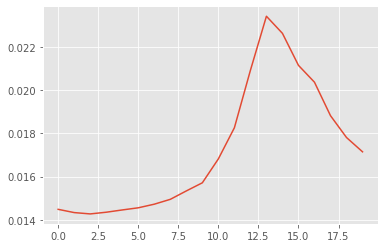

In [364]:

plt.plot(((1/(1+z[0]))*(nonsat>0))[30][20:40])


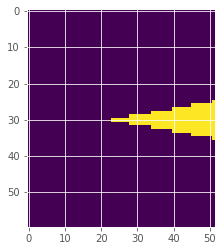

In [397]:
cix = 6
direction = 0
atol = 10
S = nonsat

coords = ps.get_coords(seeds)
dy = coords[cix][0]
dx = coords[cix][1]

mask = ps.getOrientationMask(direction,atol,S,dx,dy)
p = coords[cix]
S = nonsat
sc = ps.makeSpatialScatter(p,mask,S)
accum = ps.variogram(sc)

plt.imshow(mask)

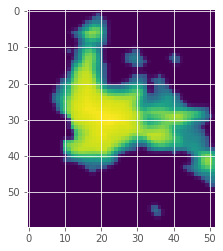

In [406]:
plt.imshow(nonsat)

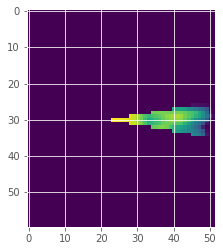

In [404]:
plt.imshow(mask*nonsat)

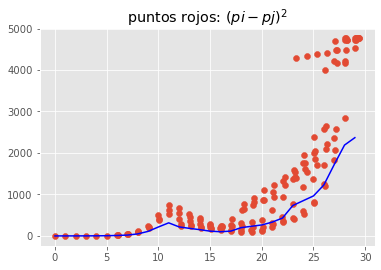

In [422]:
#plt.imshow(mask*nonsat)
#plt.show()
plt.scatter(sc[:,0],sc[:,1])
plt.title("puntos rojos: $(pi-pj)^2$")
dvar = np.append([0],accum)
plt.plot(dvar, color="blue")

plt.show()


$d^2/(2|d|)$ donde d = (pi-pj)

In [400]:
radio_a = ps.getMaxRadio(dvar,100)
args = np.where((accum[1:]-accum[:-1])<=0)


In [401]:
th=0.05
max_var = ps.getMaximumVariance(S,th)
radio_maxvar = ps.getMaxRadio(accum,max_var) 
args = np.where((dvar[1:]-dvar[:-1])<=0)
radio_first_local_max = args[0][0]+1

np.min([radio,radio_first_local_max])
args[0][0]

11

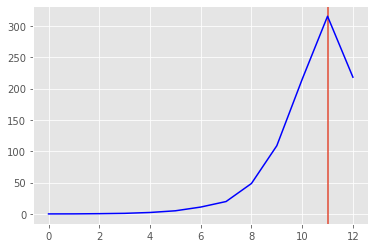

In [403]:

vline = args[0][0]
plt.axvline(x=vline)
plt.plot(dvar[:vline+2], color="blue")
plt.show()

In [370]:
radio = ps.getMaxRadio(accum,max_var)
max_var = ps.getMaximumVariance(nonsat,0.5)
radio = ps.getMaxRadio(accum,max_var)  
radio

0

In [371]:
th = 100
S = nonsat.flatten()
S_flatten = S.flatten()
vmax = np.max(S_flatten)
vmin = np.min(S_flatten)
vrange = (vmax-vmin)**2/2
max_var = th * vrange/100

In [372]:
100*(accum[5]/max_var)
accum[5]

275.89942573059574

In [373]:
mshape = nonsat
a,b = ps.fillArea(p,accum,radio,direction,mshape.shape)

In [374]:
ix=9

In [375]:
a,b,c = ps.computeRegions(nonsat,coords[ix:ix+1],th=100)

In [376]:
coords[ix:ix+1]

array([[55, 35]])

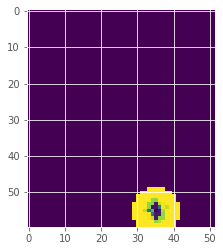

In [377]:
i2 = 0 
plt.imshow(b[i2])

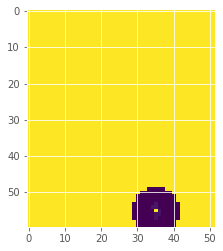

In [378]:
#b[ix][coords[ix][0]][coords[ix][1]]=np.max(b[ix])

plt.imshow(1/(1+b[i2]))

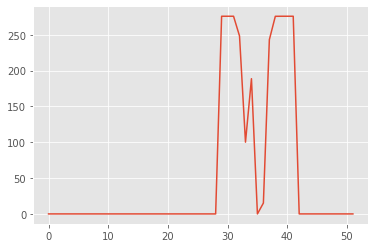

In [380]:
plt.plot(b[i2][55])

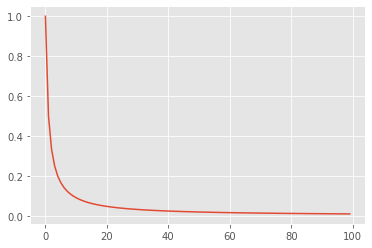

In [392]:
s = np.arange(100)
#plt.plot(s)
plt.plot((1/(1+s)))
Notas#plt.plot(np.log(1/(1+s))+1)

# Notas 10 febrero

EL variograma describe la dependencia espacial de una variable.

Describe el comportamiento una variable segun su variabilidad con respecto a la distancia. 

Es una medida de dependencia o correlación espacial.

Mide que tan estables son las mediciones con respecto a la distancia.

Mide la influencia de una medición en un punto a diferentes distancias.



Lo que comentaba Ivvan es que si tenemos una imagen con un valor constante, entonces el valor no depende del espacio.